In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('A:/1 - DS phyton/учебные датасеты/Titanic-Dataset.csv')

In [3]:
#df.head()

In [4]:
#df.describe()

In [5]:
print(df[df["Embarked"].isnull()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


In [6]:
heatdf = df[['Survived', 'PassengerId','Pclass', 'Age','SibSp','Parch','Fare']]

heatdf

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,1,3,22.0,1,0,7.2500
1,1,2,1,38.0,1,0,71.2833
2,1,3,3,26.0,0,0,7.9250
3,1,4,1,35.0,1,0,53.1000
4,0,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,887,2,27.0,0,0,13.0000
887,1,888,1,19.0,0,0,30.0000
888,0,889,3,NaN,1,2,23.4500
889,1,890,1,26.0,0,0,30.0000


In [7]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
df_new = df.copy()

In [9]:
df_new['SibSp'] = np.where(df_new['SibSp'] > 0, 1, 0)
df_new['Parch'] = np.where(df_new['Parch'] > 0, 1, 0)
df_new['Family'] = np.where((df_new['SibSp'] + df_new['Parch']) > 0, 1, 0)

In [10]:
df_new.loc[df_new.Sex == 'female', 'Sex'] = 1
df_new.loc[df_new.Sex == 'male', 'Sex'] = 0

In [11]:
# объединение семей

df_family = df.copy()

df_family['Family'] = np.where((df_family['SibSp'] + df_family['Parch']) > 0, 1, 0)
df_family = df_family[df_family['Family'] != 0]
df_family.loc[df_family.Sex == 'female', 'Sex'] = 1
df_family.loc[df_family.Sex == 'male', 'Sex'] = 0

In [12]:
df_family

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",1,28.0,1,0,P/PP 3381,24.0000,NaN,C,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,83.1583,C50,C,1
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",1,25.0,0,1,230433,26.0000,NaN,S,1
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,NaN,Q,1


In [13]:
# 1. Находим номера билетов, которые встречаются более одного раза
ticket_counts = df_family['Ticket'].value_counts()
tickets_with_group = ticket_counts[ticket_counts > 1].index

In [14]:
# 2. Фильтруем исходный датафрейм, оставляя только строки с этими билетами
df_groups = df_family[df_family['Ticket'].isin(tickets_with_group)]

In [15]:
df_groups_sorted = df_groups.sort_values('Ticket')

In [16]:
df_family_2 = df_family.copy()

In [17]:
average_age = df.groupby('Pclass')['Age'].mean()

In [18]:
df_reg = df.copy()

In [19]:
df_reg['Age'] = df_reg['Age'].fillna(
    df_reg['Pclass'].map({1: 38, 2: 30, 3: 25})
)

In [20]:
print(df_reg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [21]:
df_reg.loc[df_reg.Sex == 'female', 'Sex'] = 1
df_reg.loc[df_reg.Sex == 'male', 'Sex'] = 0

In [22]:
df_reg2 = df_reg.copy()

In [23]:
df_reg2 = df_reg2.drop('PassengerId', axis = 1)
df_reg2 = df_reg2.drop('Name', axis = 1)
df_reg2 = df_reg2.drop('Ticket', axis = 1)
df_reg2 = df_reg2.drop('Cabin', axis = 1)
df_reg2 = df_reg2.drop('Embarked', axis = 1)



In [24]:
df_reg.loc[df_reg.Embarked == 'S', 'Embarked'] = 0
df_reg.loc[df_reg.Embarked == 'C', 'Embarked'] = 1
df_reg.loc[df_reg.Embarked == 'Q', 'Embarked'] = 2

In [25]:
# есть пропущенные значения

df_reg['Embarked'] = df_reg['Embarked'].fillna(0)

C:\Users\User\AppData\Local\Temp\ipykernel_6240\3754955534.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_reg['Embarked'] = df_reg['Embarked'].fillna(0)


In [26]:
df_reg = df_reg.drop('PassengerId', axis = 1)
df_reg = df_reg.drop('Name', axis = 1)
df_reg = df_reg.drop('Ticket', axis = 1)
df_reg = df_reg.drop('Cabin', axis = 1)


In [27]:
df_reg

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,25.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


In [28]:
# k means
import warnings
warnings.filterwarnings('ignore', message='KMeans is known to have a memory leak')
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler as scaler


In [29]:
features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
#scaler = StandardScaler()

X = df_reg[features]
#X_scaler = scaler.fit_transform(X)

In [30]:
#Метод локтя 

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

Exception in thread Thread-4 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\threading.py", line 1043, in _bootstrap_inner
    self.run()
    ~~~~~~~~^^
  File "C:\Users\User\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "C:\Users\User\anaconda3\Lib\threading.py", line 994, in run
    self._target(*self._args, **self._kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\subprocess.py", line 1615, in _readerthread
    buffer.append(fh.read())
                  ~~~~~~~^^
  File "C:\Users\User\anaconda3\Lib\encodings\cp1251.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x98 in position 1: character maps to <undefined>
C:\Users\User\anaconda3\Lib\s

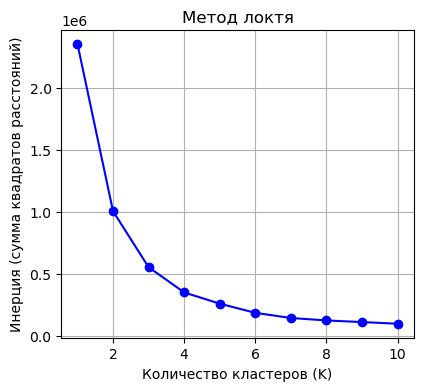

In [31]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Количество кластеров (K)')
plt.ylabel('Инерция (сумма квадратов расстояний)')
plt.title('Метод локтя')
plt.grid(True)

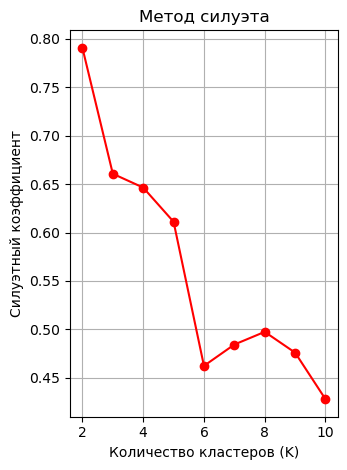

In [45]:
#метод силуэта
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):  # силуэт работает от 2 кластеров
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), sil_scores, 'ro-')
plt.xlabel('Количество кластеров (K)')
plt.ylabel('Силуэтный коэффициент')
plt.title('Метод силуэта')
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
optimal_k = 5
print(f"\nВыбрано кластеров: {optimal_k}")


Выбрано кластеров: 5


In [47]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_reg['Cluster'] = kmeans.fit_predict(X)

# Анализ кластеров
print("АНАЛИЗ КЛАСТЕРОВ:")

# Размеры кластеров
print("\nРазмеры кластеров:")
cluster_counts = df_reg['Cluster'].value_counts().sort_index()
for cluster_num in range(optimal_k):
    count = cluster_counts[cluster_num]
    percent = count / len(df_reg) * 100
    print(f"Кластер {cluster_num}: {count} объектов ({percent:.1f}%)")

# Средние значения по кластерам
print("\nСредние значения по кластерам:")
cluster_means = df_reg.groupby('Cluster').mean()
print(cluster_means.round(2))

АНАЛИЗ КЛАСТЕРОВ:

Размеры кластеров:
Кластер 0: 709 объектов (79.6%)
Кластер 1: 33 объектов (3.7%)
Кластер 2: 3 объектов (0.3%)
Кластер 3: 129 объектов (14.5%)
Кластер 4: 17 объектов (1.9%)

Средние значения по кластерам:
         Survived  Pclass       Sex    Age  SibSp  Parch    Fare  Embarked  \
Cluster                                                                      
0            0.32    2.57  0.308886  27.92   0.40   0.31   14.67      0.35   
1            0.76    1.00  0.666667  32.94   0.61   0.79  131.11      0.52   
2            1.00    1.00  0.333333  35.33   0.00   0.33  512.33      1.00   
3            0.58    1.41  0.472868  35.32   1.16   0.55   64.95      0.35   
4            0.65    1.00  0.647059  31.24   0.88   1.18  238.19      0.53   

         DBSCAN_Cluster  
Cluster                  
0                 -0.09  
1                 -1.00  
2                 -1.00  
3                 -1.00  
4                 -1.00  


In [48]:
print("ЦЕНТРЫ КЛАСТЕРОВ:")
centers = kmeans.cluster_centers_
centers_df = pd.DataFrame(centers, columns=X.columns).round(2)
print(centers_df)

ЦЕНТРЫ КЛАСТЕРОВ:
   Survived  Pclass   Sex    Age  SibSp  Parch    Fare  Embarked
0      0.32    2.57  0.31  27.92   0.40   0.31   14.67      0.35
1      0.76    1.00  0.67  32.94   0.61   0.79  131.11      0.52
2      1.00    1.00  0.33  35.33   0.00   0.33  512.33      1.00
3      0.58    1.41  0.47  35.32   1.16   0.55   64.95      0.35
4      0.65    1.00  0.65  31.24   0.88   1.18  238.19      0.53



КЛАСТЕР 0 (709 чел., 79.6%):
  Выживаемость: НИЗКАЯ (32%)
  Класс: 2.6
  Возраст: 28 лет
  Билет: $15

КЛАСТЕР 1 (33 чел., 3.7%):
  Выживаемость: ВЫСОКАЯ (76%)
  Класс: 1.0
  Возраст: 33 лет
  Билет: $131

КЛАСТЕР 2 (3 чел., 0.3%):
  Выживаемость: ВЫСОКАЯ (100%)
  Класс: 1.0
  Возраст: 35 лет
  Билет: $512

КЛАСТЕР 3 (129 чел., 14.5%):
  Выживаемость: СРЕДНЯЯ (58%)
  Класс: 1.4
  Возраст: 35 лет
  Билет: $65

КЛАСТЕР 4 (17 чел., 1.9%):
  Выживаемость: СРЕДНЯЯ (65%)
  Класс: 1.0
  Возраст: 31 лет
  Билет: $238


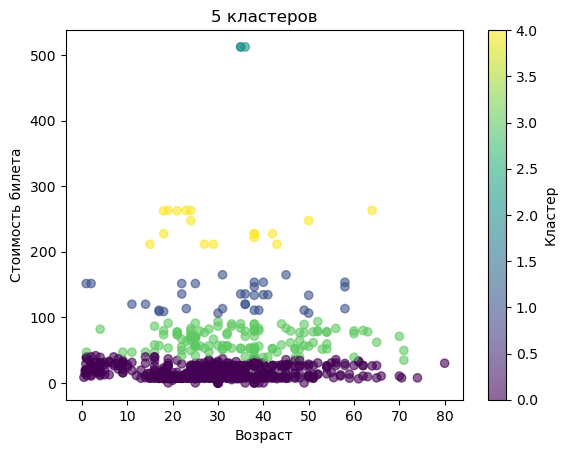

In [49]:
# Считаем средние значения по кластерам
cluster_means = df_reg.groupby('Cluster').mean()

# Анализ каждого из 5 кластеров
for i in range(5):
    count = cluster_counts.get(i, 0)
    percent = count / len(df_reg) * 100
    means = cluster_means.loc[i] if i in cluster_means.index else None
    
    print(f"\nКЛАСТЕР {i} ({count} чел., {percent:.1f}%):")
    
    if means is not None:
        # Простая интерпретация
        if 'Survived' in means:
            surv = means['Survived']
            if surv > 0.7:
                print(f"  Выживаемость: ВЫСОКАЯ ({surv:.0%})")
            elif surv > 0.4:
                print(f"  Выживаемость: СРЕДНЯЯ ({surv:.0%})")
            else:
                print(f"  Выживаемость: НИЗКАЯ ({surv:.0%})")
        
        if 'Pclass' in means:
            pclass = means['Pclass']
            print(f"  Класс: {pclass:.1f}")
        
        if 'Age' in means:
            age = means['Age']
            print(f"  Возраст: {age:.0f} лет")
        
        if 'Fare' in means:
            fare = means['Fare']
            print(f"  Билет: ${fare:.0f}")
    else:
        print("  Пустой кластер")

plt.scatter(df_reg['Age'], df_reg['Fare'], c=df_reg['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Возраст')
plt.ylabel('Стоимость билета')
plt.title('5 кластеров')
plt.colorbar(label='Кластер')
plt.show()

In [50]:
#DBSCAN

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3.0, min_samples=10)
df_reg['DBSCAN_Cluster'] = dbscan.fit_predict(X)


unique_labels = np.unique(df_reg['DBSCAN_Cluster'])
print(f"Всего меток: {unique_labels}")
clusters = [label for label in unique_labels if label != -1]
noise_count = (df_reg['DBSCAN_Cluster'] == -1).sum()
print(f"\nКоличество кластеров: {len(clusters)}")
print(f"Шумовых точек: {noise_count} ({noise_count/len(df_reg)*100:.1f}%)")

Всего меток: [-1  0  1  2  3]

Количество кластеров: 4
Шумовых точек: 387 (43.4%)


In [51]:
print("\nРазмеры кластеров:")
for label in unique_labels:
    count = (df_reg['DBSCAN_Cluster'] == label).sum()
    percent = count / len(df_reg) * 100
    if label == -1:
        print(f"Шум (-1): {count} объектов ({percent:.1f}%)")
    else:
        print(f"Кластер {label}: {count} объектов ({percent:.1f}%)")


Размеры кластеров:
Шум (-1): 387 объектов (43.4%)
Кластер 0: 424 объектов (47.6%)
Кластер 1: 32 объектов (3.6%)
Кластер 2: 35 объектов (3.9%)
Кластер 3: 13 объектов (1.5%)


In [52]:
print("\nСредние значения по кластерам (без шума):")
if len(clusters) > 0:
    # Фильтруем шум
    df_clusters = df_reg[df_reg['DBSCAN_Cluster'] != -1]
    cluster_means = df_clusters.groupby('DBSCAN_Cluster')[features].mean().round(2)
    print(cluster_means)


Средние значения по кластерам (без шума):
                Survived  Pclass       Sex    Age  SibSp  Parch   Fare  \
DBSCAN_Cluster                                                           
0                   0.25    2.83  0.252358  26.27   0.13   0.07   9.43   
1                   0.44    1.44    0.0625  37.14   0.22   0.25  27.19   
2                   0.43    2.43  0.571429  26.37   1.20   0.57  24.87   
3                   0.46    1.46  0.384615  45.12   0.38   0.15  26.45   

                Embarked  
DBSCAN_Cluster            
0                   0.41  
1                   0.25  
2                   0.49  
3                   0.08  


In [53]:
print("АНАЛИЗ КЛАСТЕРОВ DBSCAN:")

for label in clusters:
    cluster_data = df_reg[df_reg['DBSCAN_Cluster'] == label]
    count = len(cluster_data)
    percent = count / len(df_reg) * 100
    
    print(f"\nКЛАСТЕР {label} ({count} чел., {percent:.1f}%):")
    
    if 'Survived' in cluster_data.columns:
        surv = cluster_data['Survived'].mean()
        if surv > 0.7:
            print(f"  Выживаемость: ВЫСОКАЯ ({surv:.0%})")
        elif surv > 0.4:
            print(f"  Выживаемость: СРЕДНЯЯ ({surv:.0%})")
        else:
            print(f"  Выживаемость: НИЗКАЯ ({surv:.0%})")
    
    if 'Pclass' in cluster_data.columns:
        pclass = cluster_data['Pclass'].mean()
        print(f"  Класс: {pclass:.1f}")
    
    if 'Age' in cluster_data.columns:
        age = cluster_data['Age'].mean()
        print(f"  Возраст: {age:.0f} лет")
    
    if 'Fare' in cluster_data.columns:
        fare = cluster_data['Fare'].mean()
        print(f"  Билет: ${fare:.0f}")

АНАЛИЗ КЛАСТЕРОВ DBSCAN:

КЛАСТЕР 0 (424 чел., 47.6%):
  Выживаемость: НИЗКАЯ (25%)
  Класс: 2.8
  Возраст: 26 лет
  Билет: $9

КЛАСТЕР 1 (32 чел., 3.6%):
  Выживаемость: СРЕДНЯЯ (44%)
  Класс: 1.4
  Возраст: 37 лет
  Билет: $27

КЛАСТЕР 2 (35 чел., 3.9%):
  Выживаемость: СРЕДНЯЯ (43%)
  Класс: 2.4
  Возраст: 26 лет
  Билет: $25

КЛАСТЕР 3 (13 чел., 1.5%):
  Выживаемость: СРЕДНЯЯ (46%)
  Класс: 1.5
  Возраст: 45 лет
  Билет: $26


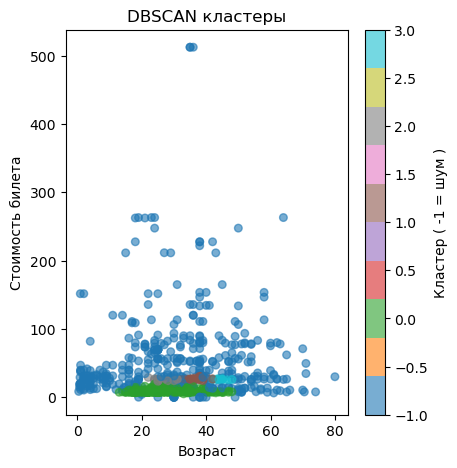

In [54]:
# визуализация
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(df_reg['Age'], df_reg['Fare'], 
                     c=df_reg['DBSCAN_Cluster'], cmap='tab10', alpha=0.6, s=30)
plt.xlabel('Возраст')
plt.ylabel('Стоимость билета')
plt.title('DBSCAN кластеры')
plt.colorbar(scatter, label='Кластер ( -1 = шум )')

In [55]:
# k-means вручную

features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df_reg[features].copy()

data = X.values
n_samples = data.shape[0]

k = 5  
max_iter = 10
np.random.seed(42)
centers = data[np.random.choice(n_samples, k, replace=False)]

In [56]:
for iteration in range(max_iter):
    
    labels = [] 
    for point in data:
        # Считаем расстояние до каждого центра
        distances = []
        for center in centers:
            # Евклидово расстояние
            dist = np.sqrt(((point - center) ** 2).sum())
            distances.append(dist)
        # Выбираем ближайший центр
        labels.append(np.argmin(distances))
    
    labels = np.array(labels)
    
    # Пересчитываем центры
    new_centers = []
    for i in range(k):
        # Берем все точки кластера i
        cluster_points = data[labels == i]
        if len(cluster_points) > 0:
            # Новый центр = среднее всех точек
            new_center = cluster_points.mean(axis=0)
        else:
            # Если кластер пустой, оставляем старый центр
            new_center = centers[i]
        new_centers.append(new_center)
    
    centers = np.array(new_centers)

In [57]:
print("РЕЗУЛЬТАТЫ РУЧНОГО K-MEANS (5 кластеров):")

# Добавляем метки в DataFrame
df_reg['Cluster'] = labels

print("\nРАЗМЕРЫ КЛАСТЕРОВ:")
for i in range(k):
    count = np.sum(labels == i)
    percent = count / n_samples * 100
    print(f"Кластер {i}: {count} объектов ({percent:.1f}%)")

print("\nСРЕДНИЕ ЗНАЧЕНИЯ ПО КЛАСТЕРАМ:")
for i in range(k):
    print(f"\nКластер {i}:")
    cluster_data = data[labels == i]
    if len(cluster_data) > 0:
        cluster_mean = cluster_data.mean(axis=0)
        for j, feature in enumerate(features):
            print(f"  {feature}: {cluster_mean[j]:.2f}")

РЕЗУЛЬТАТЫ РУЧНОГО K-MEANS (5 кластеров):

РАЗМЕРЫ КЛАСТЕРОВ:
Кластер 0: 101 объектов (11.3%)
Кластер 1: 183 объектов (20.5%)
Кластер 2: 466 объектов (52.3%)
Кластер 3: 20 объектов (2.2%)
Кластер 4: 121 объектов (13.6%)

СРЕДНИЕ ЗНАЧЕНИЯ ПО КЛАСТЕРАМ:

Кластер 0:
  Survived: 0.67
  Pclass: 1.21
  Sex: 0.59
  Age: 34.60
  SibSp: 1.14
  Parch: 0.60
  Fare: 95.16
  Embarked: 0.46

Кластер 1:
  Survived: 0.39
  Pclass: 1.77
  Sex: 0.31
  Age: 45.07
  SibSp: 0.32
  Parch: 0.43
  Fare: 27.22
  Embarked: 0.22

Кластер 2:
  Survived: 0.26
  Pclass: 2.80
  Sex: 0.27
  Age: 25.91
  SibSp: 0.21
  Parch: 0.12
  Fare: 9.93
  Embarked: 0.42

Кластер 3:
  Survived: 0.70
  Pclass: 1.00
  Sex: 0.60
  Age: 31.85
  SibSp: 0.75
  Parch: 1.05
  Fare: 279.31
  Embarked: 0.60

Кластер 4:
  Survived: 0.55
  Pclass: 2.38
  Sex: 0.47
  Age: 13.42
  SibSp: 1.49
  Parch: 1.03
  Fare: 32.12
  Embarked: 0.21
